In [3]:
%config Completer.use_jedi = False

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno 

In [5]:
df = pd.read_csv("Bike_use.csv")
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,NaN,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
5,01-01-2011 05:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,1,1
6,01-01-2011 06:00,1,0,0,1,9.02,13.635,80.0,0.0000,2,0,2
7,01-01-2011 07:00,1,0,0,1,8.20,12.880,NaN,0.0000,1,2,3
8,01-01-2011 08:00,1,0,0,1,9.84,14.395,75.0,0.0000,1,7,8
9,01-01-2011 09:00,1,0,0,1,13.12,17.425,76.0,0.0000,8,6,14


In [6]:
df.shape

(10886, 12)

## Data Pre-Processing

### Finding Missing Values

In [7]:
missing_data = df.isnull()
missing_data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


### Count Missing Values

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

datetime
False    10886
Name: datetime, dtype: int64

season
False    10886
Name: season, dtype: int64

holiday
False    10886
Name: holiday, dtype: int64

workingday
False    10886
Name: workingday, dtype: int64

weather
False    10886
Name: weather, dtype: int64

temp
False    10886
Name: temp, dtype: int64

atemp
False    10886
Name: atemp, dtype: int64

humidity
False    10880
True         6
Name: humidity, dtype: int64

windspeed
False    10886
Name: windspeed, dtype: int64

casual
False    10886
Name: casual, dtype: int64

registered
False    10886
Name: registered, dtype: int64

count
False    10886
Name: count, dtype: int64



### Replacing Missing Values

In [9]:
avg_humidity = df["humidity"].astype("float").mean(axis=0)
print("Average Humidity:", avg_humidity)

Average Humidity: 61.87950367647059


In [10]:
df["humidity"].replace(np.nan, avg_humidity, inplace=True)

In [11]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81.000000,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80.000000,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80.000000,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,61.879504,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75.000000,0.0000,0,1,1
5,01-01-2011 05:00,1,0,0,2,9.84,12.880,75.000000,6.0032,0,1,1
6,01-01-2011 06:00,1,0,0,1,9.02,13.635,80.000000,0.0000,2,0,2
7,01-01-2011 07:00,1,0,0,1,8.20,12.880,61.879504,0.0000,1,2,3
8,01-01-2011 08:00,1,0,0,1,9.84,14.395,75.000000,0.0000,1,7,8
9,01-01-2011 09:00,1,0,0,1,13.12,17.425,76.000000,0.0000,8,6,14


### Check if Missing values exist

<AxesSubplot:>

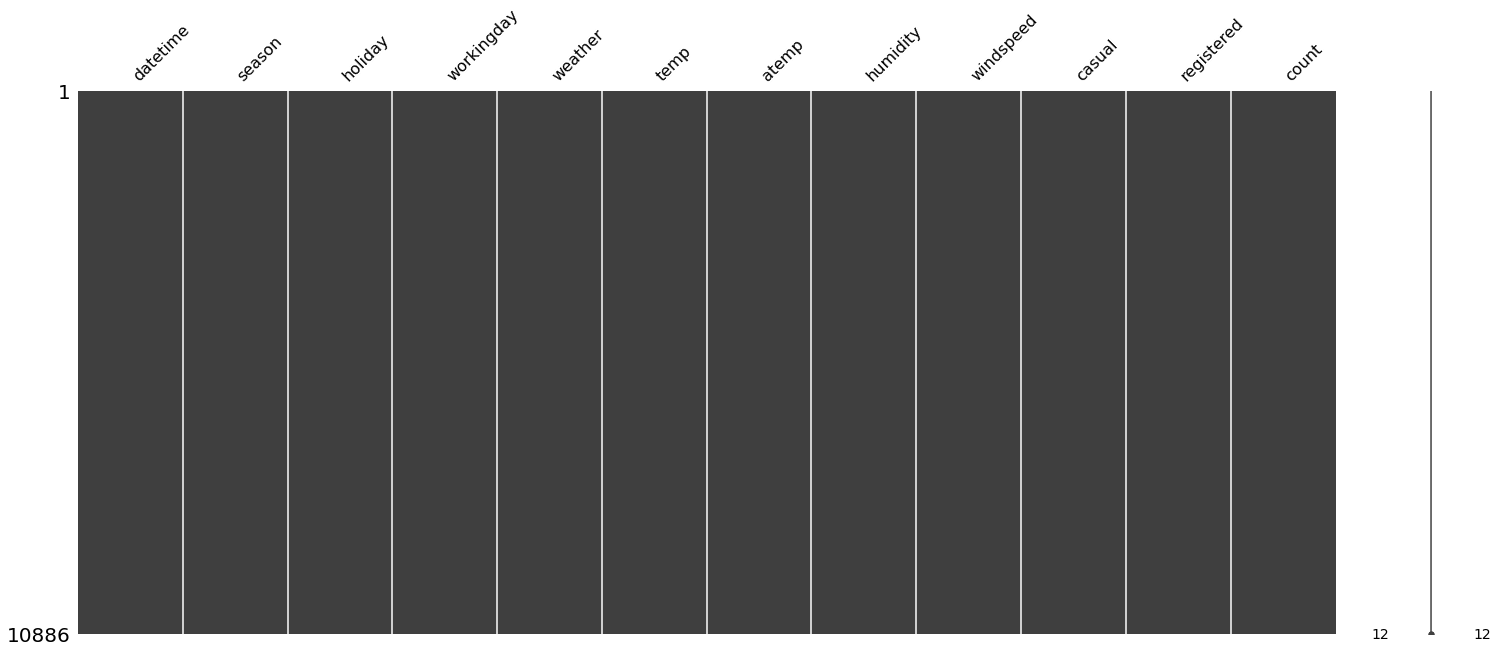

In [12]:
msno.matrix(df)

### Check Datatypes 

In [13]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [14]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.879504,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.238558,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## FEATURE ENGINEERING

### Split DateTime for getting better insights from data 

In [15]:
temp = pd.DatetimeIndex(df['datetime'])
df['year'] = temp.year
df['month'] = temp.month
df['hour'] = temp.hour
df['weekday'] = temp.weekday
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81.000000,0.0,3,13,16,2011,1,0,5
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80.000000,0.0,8,32,40,2011,1,1,5
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80.000000,0.0,5,27,32,2011,1,2,5
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,61.879504,0.0,3,10,13,2011,1,3,5
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75.000000,0.0,0,1,1,2011,1,4,5


### Drop DateTime

In [16]:
df  = df.drop(["datetime"],axis=1)

## EXPLORATORY DATA ANALYSIS - Visualization

### Grouping by season, plot the box plot

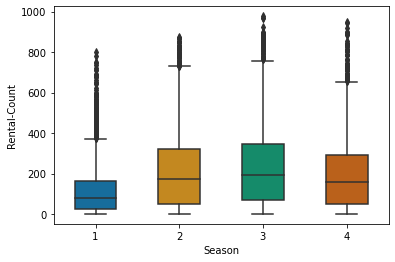

In [17]:
season_group= (df.groupby("season"))["count"].sum()
season_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='season',data=df,width=0.5,palette="colorblind")
plt.xlabel('Season')
plt.ylabel('Rental-Count')
plt.show()

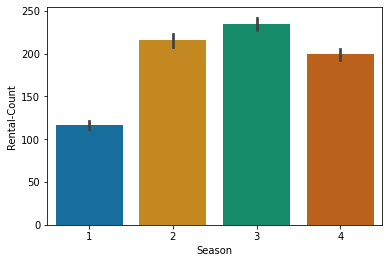

In [18]:
sns.barplot(x='season', y='count', data=df,palette="colorblind")
plt.xlabel('Season')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (6, 5)

### Grouping by weekday, plot the box plot

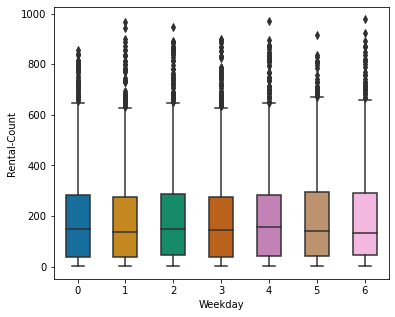

In [19]:
weekday_group= (df.groupby("weekday"))["count"].sum()
weekday_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='weekday',data=df,width=0.5,palette="colorblind")
plt.xlabel('Weekday')
plt.ylabel('Rental-Count')
plt.show()

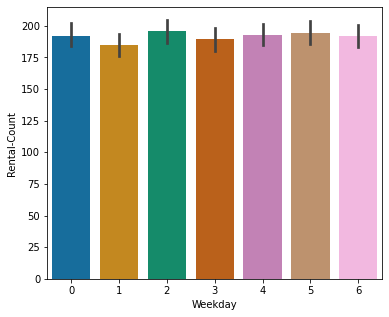

In [20]:
weekday_group= (df.groupby("weekday"))["count"].sum()
weekday_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='weekday',data=df,palette="colorblind")
plt.xlabel('Weekday')
plt.ylabel('Rental-Count')
plt.show()

### Seeing the difference between workday and non-workday 

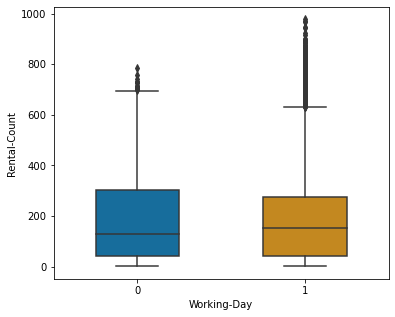

In [21]:
wd_group= (df.groupby("workingday"))["count"].sum()
wd_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='workingday',data=df,width=0.5,palette="colorblind")
plt.xlabel('Working-Day')
plt.ylabel('Rental-Count')
plt.show()

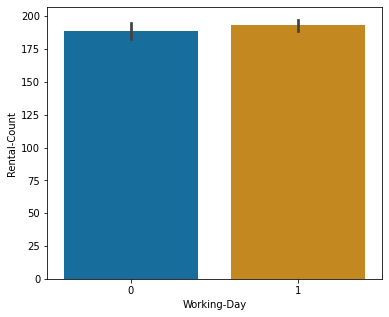

In [22]:
wd_group= (df.groupby("workingday"))["count"].sum()
wd_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='workingday',data=df,palette="colorblind")
plt.xlabel('Working-Day')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (6, 5)

### Grouping by weather and plot the box plot 

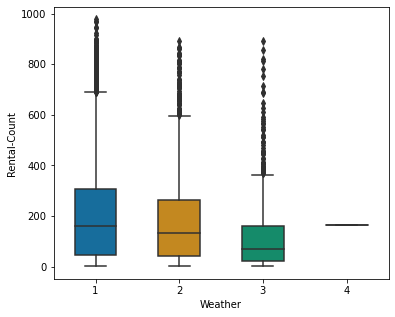

In [23]:
weather_group= (df.groupby("weather"))["count"].sum()
weather_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='weather',data=df,width=0.5,palette="colorblind")
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Weather')
plt.ylabel('Rental-Count')
plt.show()

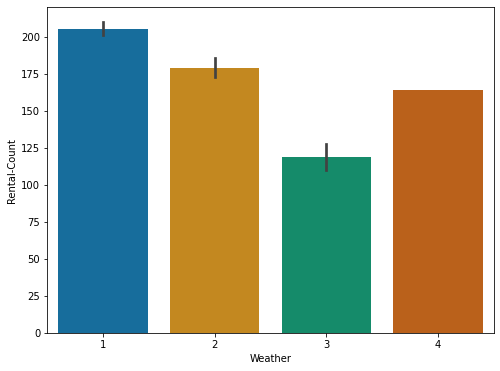

In [24]:
sns.barplot(x='weather', y='count', data=df,palette="colorblind")
plt.xlabel('Weather')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (6, 5)

### Group by season and see the difference between the 2 years 

Text(0, 0.5, 'Rental-Count')

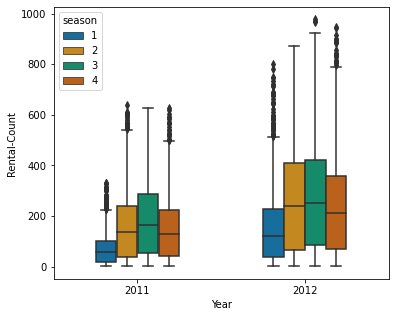

In [25]:
sns.boxplot(y='count',x='year',data=df,hue='season',width=0.5,palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')

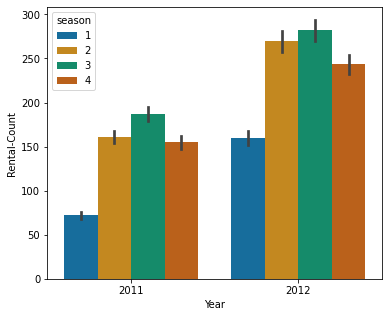

In [26]:
sns.barplot(y='count',x='year',data=df,hue='season',palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (6.5, 6)

### Annual change

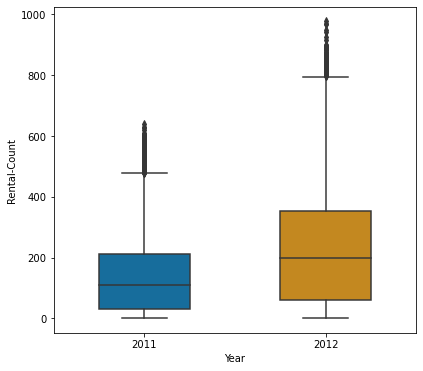

In [27]:
year_group= (df.groupby("year"))["count"].sum()
year_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='year',data=df,width=0.5,palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')
plt.show()

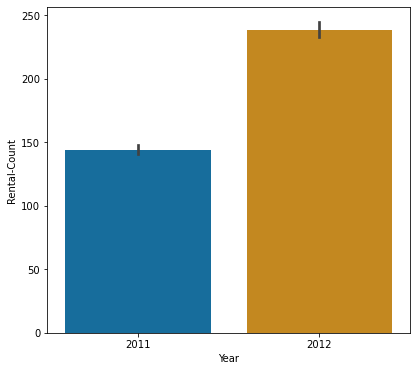

In [28]:
year_group= (df.groupby("year"))["count"].sum()
year_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='year',data=df,palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (5, 5)

###  Monthly change

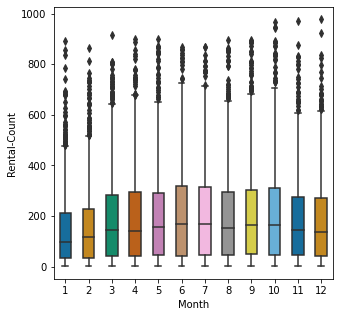

In [29]:
month_group= (df.groupby("month"))["count"].sum()
month_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='month',data=df,width=0.5,palette="colorblind")
plt.xlabel('Month')
plt.ylabel('Rental-Count')
plt.show()

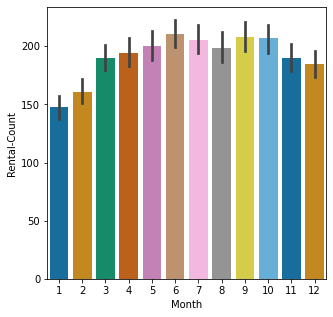

In [30]:
month_group= (df.groupby("month"))["count"].sum()
month_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='month',data=df,palette="colorblind")
plt.xlabel('Month')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (8, 6)

###  Hourly change expressed in bar graph

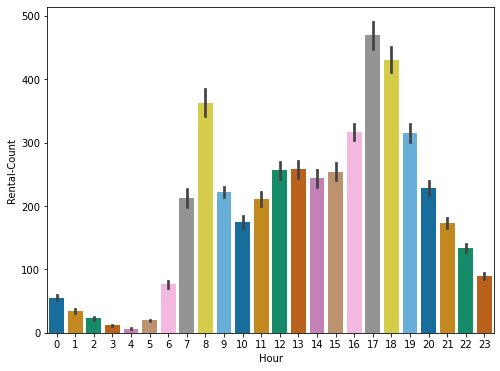

In [31]:
hour_group= (df.groupby("hour"))["count"].sum()
hour_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='hour',data=df,palette="colorblind")
plt.xlabel('Hour')
plt.ylabel('Rental-Count')
plt.show()

# Average Users Count By Hour Of The Day Across Season

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

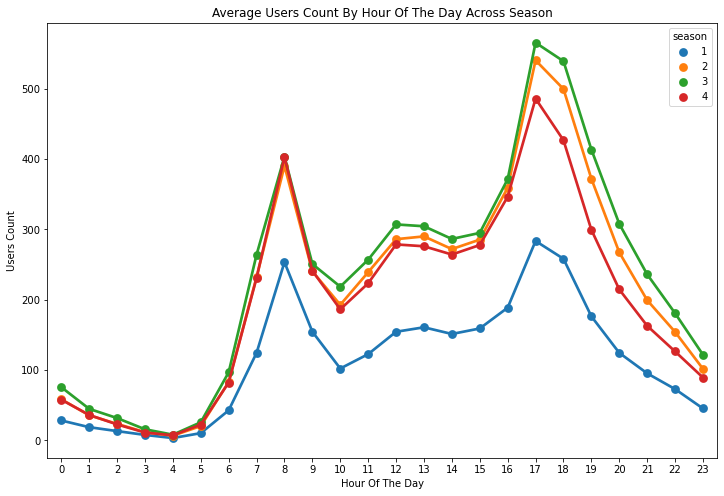

In [32]:
fig,(ax2)= plt.subplots()
fig.set_size_inches(12,8)

hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


## MODEL BUILDING 

### Understand dependencies between Attributes

In [33]:
corr = df.corr()
corr.style.background_gradient().set_precision(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
season,1.0,0.0,-0.0,0.0,0.3,0.3,0.2,-0.1,0.1,0.2,0.2,-0.0,0.4,-0.0,-0.0
holiday,0.0,1.0,-0.3,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.1,-0.0,-0.1
workingday,-0.0,-0.3,1.0,0.0,0.0,0.0,-0.0,0.0,-0.3,0.1,0.0,-0.0,0.0,0.0,-0.3
weather,0.0,-0.0,0.0,1.0,-0.1,-0.1,0.4,0.0,-0.1,-0.1,-0.1,-0.0,-0.0,-0.0,-0.0
temp,0.3,0.0,0.0,-0.1,1.0,1.0,-0.1,-0.0,0.5,0.3,0.4,0.1,0.0,0.1,-0.0
atemp,0.3,-0.0,0.0,-0.1,1.0,1.0,-0.0,-0.1,0.5,0.3,0.4,0.1,0.0,0.1,-0.0
humidity,0.2,0.0,-0.0,0.4,-0.1,-0.0,1.0,-0.3,-0.3,-0.3,-0.3,-0.1,0.0,-0.3,-0.0
windspeed,-0.1,0.0,0.0,0.0,-0.0,-0.1,-0.3,1.0,0.1,0.1,0.1,-0.0,-0.0,0.1,-0.0
casual,0.1,0.0,-0.3,-0.1,0.5,0.5,-0.3,0.1,1.0,0.5,0.7,0.1,0.0,0.3,0.1
registered,0.2,-0.0,0.1,-0.1,0.3,0.3,-0.3,0.1,0.5,1.0,1.0,0.3,0.1,0.4,-0.0


### Dependencies using HeatMap 

<AxesSubplot:>

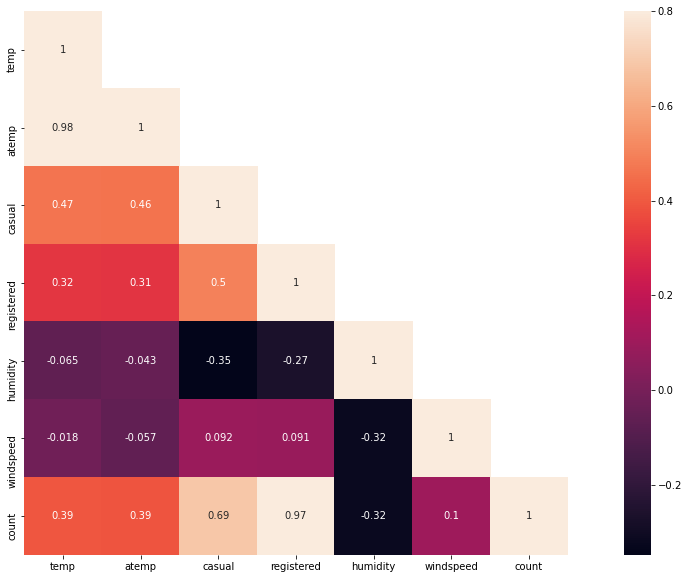

In [34]:
corrMatt = df[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

## Finding Relationship using Scatter Plots

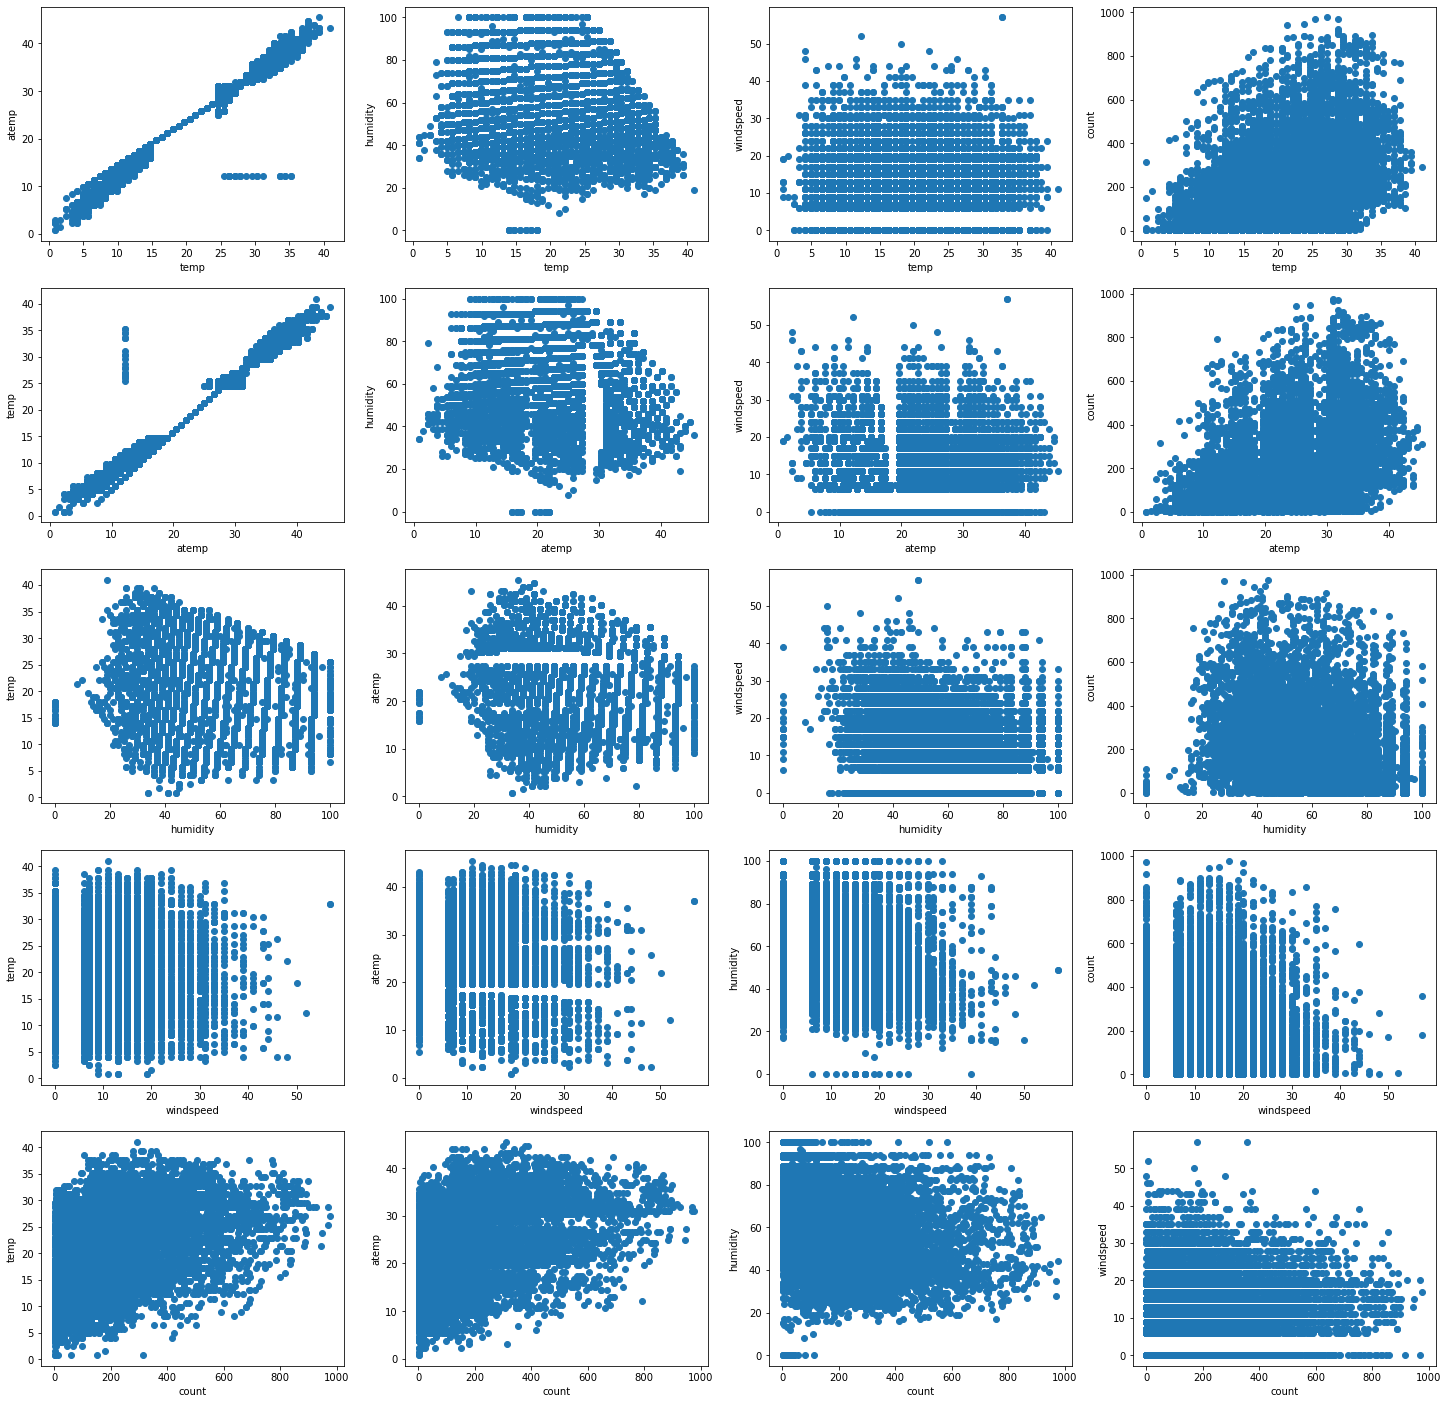

In [47]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25,25))
columns = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
ax= axes.flatten()
a,b=4.5,3
idx = 0
for i, val1 in enumerate(columns):
    for j, val2 in enumerate(columns):
        if val1!=val2:
            ax[idx].scatter(df[val1], df[val2])
            ax[idx].set_xlabel(val1)
            ax[idx].set_ylabel(val2)
            idx+=1

plt.show()

# REGRESSION 

## Linear Regression

### Temp as independent variable 

In [36]:
from sklearn.model_selection import train_test_split
x = df[["temp"]]
y = df[["count"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [37]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [38]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 
prediction = pd.DataFrame(LR_preds, columns=['predictions']).to_csv('prediction_temp.csv')

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, LR_preds)

27691.415546768512

In [41]:
y_hat= model.predict(x_test[["temp"]])
x = np.asanyarray(x_test[["temp"]])
y = np.asanyarray(y_test[["count"]])

print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))
score=model.score(x, y)*a
print('Variance score: %.2f' % score)

Residual sum of squares: 27691.42
Variance score: 0.75


### Random Forest

In [125]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train) 
RF_preds = model.predict(x_test)  
np.exp(RF_preds).mean() 
prediction2 = pd.DataFrame(LR_preds, columns=['rf_predictions_t']).to_csv('rf_prediction_t.csv')

C:\Users\Tauseef Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, RF_preds)

27691.415546768512

### Atemp as independent variable

In [90]:
from sklearn.model_selection import train_test_split
x = df[["atemp"]]
y = df[["count"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [91]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [92]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 
prediction = pd.DataFrame(LR_preds, columns=['predictions']).to_csv('prediction_atem.csv')

In [93]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, LR_preds)

28082.685984903077

In [94]:
y_hat= model.predict(x_test[["atemp"]])
x = np.asanyarray(x_test[["atemp"]])
y = np.asanyarray(y_test[["count"]])

print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))
score=model.score(x, y)*a
print('Variance score: %.2f' % score)

Residual sum of squares: 28082.69
Variance score: 0.70


## Multilinear Regression

In [95]:
from sklearn.model_selection import train_test_split
x = df[["temp","atemp"]]
y = df[["count"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [96]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [97]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 
prediction = pd.DataFrame(LR_preds, columns=['predictions']).to_csv('prediction_tem_atem.csv')

In [98]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, LR_preds)

28013.621971820416

In [99]:
y_hat= model.predict(x_test[["temp","atemp"]])
x = np.asanyarray(x_test[["temp","atemp"]])
y = np.asanyarray(y_test[["count"]])

print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))
score=model.score(x, y)*a
print('Variance score: %.2f' % score)

Residual sum of squares: 28013.62
Variance score: 0.71


## Final

In [42]:
from sklearn.model_selection import train_test_split
x = df[["temp","atemp","humidity", "windspeed"]]
y = df[["count"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [44]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 
prediction = pd.DataFrame(LR_preds, columns=['predictions']).to_csv('prediction_main.csv')

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, LR_preds)

24883.082618043285

In [48]:
y_hat= model.predict(x_test[["temp","atemp","humidity", "windspeed"]])
x = np.asanyarray(x_test[["temp","atemp","humidity", "windspeed"]])
y = np.asanyarray(y_test[["count"]])

print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))
score=model.score(x, y)*b
print('Variance score: %.2f' % score)

Residual sum of squares: 24883.08
Variance score: 0.75


In [49]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[ 3.23859734  5.13813975 -2.73025578  0.38977232]]
Intercept:  [168.15521918]


### Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train) 
RF_preds = model.predict(x_test)  
np.exp(RF_preds).mean() 
prediction2 = pd.DataFrame(RF_preds, columns=['rf_predictions_mul']).to_csv('rf_prediction_mul.csv')

C:\Users\Tauseef Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, RF_preds)

28013.621971820416

## Test below

# Regression - xxxxxxxx

In [127]:
from sklearn.model_selection import train_test_split
x = df[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed"]]
y = df[["count"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [128]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [129]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 
prediction = pd.DataFrame(LR_preds, columns=['predictions']).to_csv('prediction.csv')

In [130]:
for i in LR_preds:
    if i<0:
        print(i)

[-22.81270666]
[-22.81270666]
[-20.98452658]
[-38.6943292]
[-13.16351354]
[-27.304449]
[-1.6564498]
[-7.78193147]
[-40.53236463]
[-18.60440464]
[-8.97398584]
[-44.24314877]
[-25.7224061]
[-48.13609055]
[-43.06493657]
[-26.30117034]
[-24.5995748]
[-26.27007475]
[-17.25004491]
[-2.16813781]
[-19.31113369]
[-60.44435765]
[-21.6717842]
[-19.31113369]
[-11.47912431]
[-39.00007337]
[-3.15674722]
[-22.81270666]
[-2.82710988]
[-22.0160079]
[-21.84330649]
[-2.82710988]
[-45.4640666]
[-4.12614738]
[-19.95015233]
[-9.91530951]
[-41.5017648]
[-6.56041335]
[-18.98075216]
[-27.75055569]
[-9.62379967]
[-37.82186117]
[-38.48511802]
[-37.82186117]
[-18.33558646]


In [131]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, LR_preds)

24501.742805768492

In [132]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(x_train[['temp']])
y = np.asanyarray(y_train[['count']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.16748088]]
Intercept:  [6.1162672]


In [133]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(x_train[['atemp']])
y = np.asanyarray(y_train[['count']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[8.30958316]]
Intercept:  [-4.96898623]


## Random Forest 

In [134]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train) 
RF_preds = model.predict(x_test)  
np.exp(RF_preds).mean() 
prediction2 = pd.DataFrame(LR_preds, columns=['rf_predictions']).to_csv('rf_prediction.csv')

C:\Users\Tauseef Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [135]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, RF_preds)

24501.742805768492

## Multiple Regression 

In [136]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(x_train[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed"]])
y = np.asanyarray(y_train[["count"]])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[23.68149066 -8.00798816  0.96940017  5.51149445  2.55731495  4.92747068
  -3.06346918  0.59504536]]


In [138]:
y_hat= regr.predict(x_test[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed"]])
x = np.asanyarray(x_test[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed"]])
y = np.asanyarray(y_test[["count"]])

print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 24501.74
Variance score: 0.26


In [139]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(x_train[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed"]])
y = np.asanyarray(y_train[["count"]])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[23.68149066 -8.00798816  0.96940017  5.51149445  2.55731495  4.92747068
  -3.06346918  0.59504536]]


In [140]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean()

1.841561890781108e+191

In [141]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [142]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['weather']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-35.15695018]]
Intercept:  [241.68674583]


In [145]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['humidity']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-2.97879352]]
Intercept:  [375.893928]


In [146]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['windspeed']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[2.10052516]]
Intercept:  [164.68630456]


## Simple Scaling Normalization

In [ ]:
df_max_scaled = cdf.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
df_max_scaled.plot(kind = 'bar')

In [ ]:
cdf=df_max_scaled.copy()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['weather']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['temp']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['atemp']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)